In [1]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_line,
    geom_histogram,
    geom_bar
 )
import numpy as np
import random


In [2]:
!ls -l /home/thusitha/work/bigdata/recomendation/data_recomndation/

total 529880
-rw-rw-r-- 1 thusitha thusitha      7131 Oct 21  2019 'DS Question 3 - problem statement.docx'
-rw-rw-r-- 1 thusitha thusitha      3722 Oct 23  2019  Explore.py
-rw-r--r-- 1 thusitha thusitha   8472263 Aug  6  2019  item_metadata.csv
-rw-r--r-- 1 thusitha thusitha 534104946 Aug  6  2019  user_behaviour_complete.csv


In [3]:
RAW_DATA_PATH = "/home/thusitha/work/bigdata/recomendation/data_recomndation/user_behaviour_complete.csv"
META_DATA_PATH = "/home/thusitha/work/bigdata/recomendation/data_recomndation/item_metadata.csv"

# behavior_type	 {‘click’, ‘add to wishlist’, ‘add to cart’, ‘pay’}

In [4]:
user_behav_dt = pd.read_csv(RAW_DATA_PATH)
#meta_dt = pd.read_csv(META_DATA_PATH)

In [5]:
user_behav_dt.head()

,user_id,item_id,behavior_type,user_location_hash,item_category,time
0,99512554,37320317,3,94gn6nd,9232,2014-11-26 20
1,9909811,266982489,1,NaN,3475,2014-12-02 23
2,98692568,27121464,1,94h63np,5201,2014-11-19 13
3,96089426,114407102,1,949g5i3,836,2014-11-26 07
4,90795949,402391768,1,94h6dlp,3046,2014-12-09 21


In [7]:
print("rows",  user_behav_dt.shape[0], " users:",  user_behav_dt["user_id"].nunique(), " items", user_behav_dt["item_id"].nunique())


rows 12312542  users: 10000  items 2914411


/home/thusitha/work/virtual/seek-analysis/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 178'. Pick better value with 'binwidth'.


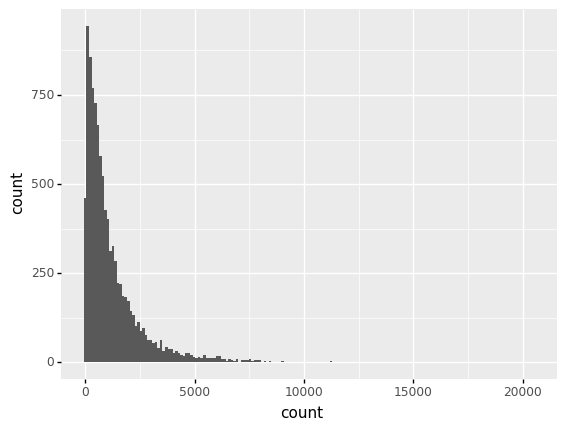

<ggplot: (8731673678327)>

In [5]:
user_interactions_cnt = user_behav_dt[["user_id", "item_id"]].groupby("user_id").count().reset_index().rename(columns = {"item_id": "count"}).sort_values("count")

( ggplot(user_interactions_cnt) +
   aes(x = "count") +
   geom_histogram()
)

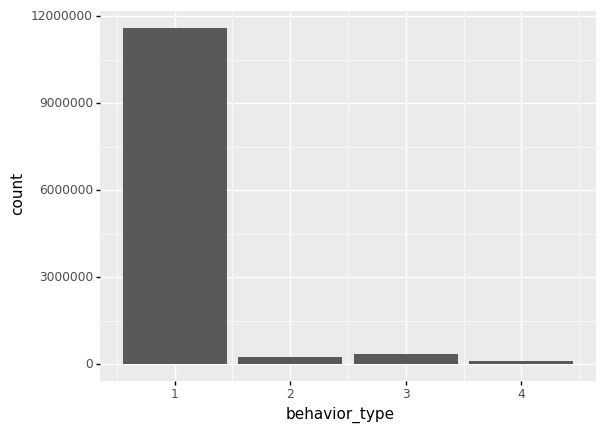

<ggplot: (8731673653962)>

In [6]:
( ggplot(user_behav_dt) +
   aes(x = "behavior_type") +
   geom_bar(stat = "count")
)

In [43]:
# get a sample of 1000 user for a test fit of a basic algo

SAMPLE_PATH = "/home/thusitha/work/projects/recommendation_take_home/data/sample_1k_users.csv"
users = user_behav_dt[["user_id"]]

random.seed(0)
users_sample = users.sample(n=1000)

user_behav_dt_sample = user_behav_dt.merge(users_sample, on = ["user_id"], how = "inner")
user_behav_dt_sample.to_csv(SAMPLE_PATH, index=False)


/home/thusitha/work/virtual/seek-analysis/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 723'. Pick better value with 'binwidth'.


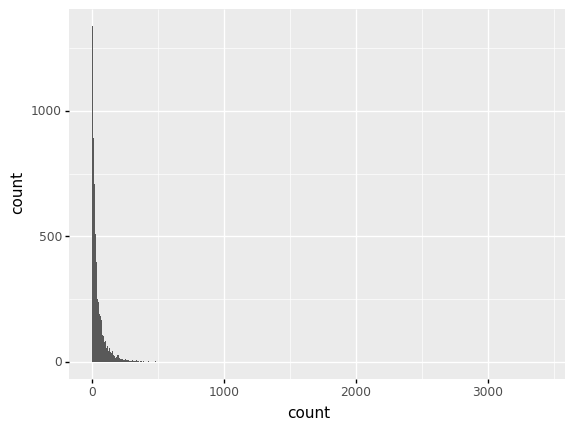

<ggplot: (8731673573334)>

In [12]:
user_interactions_cnt = user_behav_dt[user_behav_dt["behavior_type"].isin([3, 4])][["user_id", "item_id"]].groupby("user_id").count().reset_index().rename(columns = {"item_id": "count"}).sort_values("count")

( ggplot(user_interactions_cnt) +
   aes(x = "count") +
   geom_histogram()
)


In [13]:
FILTERED_DATA_PATH = "/home/thusitha/work/projects/recommendation_take_home/data/filtered_events.csv"
user_behav_dt_filtered = user_behav_dt[user_behav_dt["behavior_type"].isin([3, 4])]
user_behav_dt_filtered.to_csv(FILTERED_DATA_PATH, index=False)

